# Sentiment Analysis using Deep Learning
________________________________________________________________________________________
## Outline

* Sentiment Analysis Introduction <br><br>

* #### Case Study
    * Keras IMDB Dataset<br><br>
    * Data Analysis<br><br>
    * Word Embeddings<br><br>
    * Convolutional Neural Network<br><br>
    * Summary
    ____

# Introduction
## Sentiment Analysis
---

Sentiment analysis is a very beneficial approach to automate the classification of the polarity of a given text. A helpful indication to decide if the customers on amazon like a product or not is for example the star rating. The same applies to many other use cases. However, the underlying basis for the review rating is the raw text material containing the customer's opinion. Therefore, analyzing and categorizing the sentiment of reviews, emails, blog posts and other texts is undoubtedly useful for firms to evaluate the perception of their customers regarding their products, services or as well of the firm by itself. Analyzing the public opinion and brand awareness supports managing the strategy of a firm and the business decisions.

Now before we start with the our tutorial, let's first have a look on the basic sentiment analysis steps and characteristics.


________________________________________________________________________________________
### Sentiment Analysis
* Computational study of opinions, sentiments and emotions in text
* Task: Classifying the expressed opinion of a text (positive, negative, neutral)
* Sentiment analysis uses:  
    * natural language processing (NLP)
    * text analysis 
    * computational techniques 
* to automate the extraction or classification of sentiment from text


### Types of sentiment
* structured 
* semi-structured
* unstructured

### Different levels of Sentiment Analysis:
* Document based: One score for the whole document (e.g. review)
* Sentence based: Does sentence express positive, neutral, negative opinion
* Aspect based: Focus on a specific aspect and identify what people like/dislike

### Why do we need sentiment analysis? 

* it becomes a hot area in decisionmaking
* 97% of customer’s read online reviews for local business in 2017 (Local Consumer Review Survey 2017)
* 85% of consumers trust online reviews as much as personal recommendations (Local Consumer Review Survey 2017)

______________________________________________________________________________________

### Challenges of Sentiment Analysis

* abbreviations (e.g. LOL, YOLO, CD9 → Code 9, parents around)
* emoticons
* sarcasm 
* negation

<img src="images/Smiley.png" alt="IMDB" style="width: 100px;"/>
___

### Preprocessing

<img src="images/Preprocessing.png" alt="IMDB" style="width: 900px;"/>
______________________________________________________________________________________

### Example

In [74]:
# import the 
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer

#### 1. Step Tokenization: Split each token/word for itself

In [75]:
# Tokenization
data = "Titanic is a great movie but the worst movie made by one of the greatest directors, called James Cameron!"
tokenizer = RegexpTokenizer(r'\w+')
word_tokens = tokenizer.tokenize(data)
print(word_tokens)

['Titanic', 'is', 'a', 'great', 'movie', 'but', 'the', 'worst', 'movie', 'made', 'by', 'one', 'of', 'the', 'greatest', 'directors', 'called', 'James', 'Cameron']


____
#### 2. Step Stop word removal: remove stop words such as: by, my, and, a…

In [76]:
# Stopword removal
stop_words = set(stopwords.words('english')) 
filtered_sentence = [w for w in word_tokens if not w in stop_words]
 
filtered_sentence = []
 
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
        
print(filtered_sentence)

['Titanic', 'great', 'movie', 'worst', 'movie', 'made', 'one', 'greatest', 'directors', 'called', 'James', 'Cameron']


____
#### 3. Step Stemming: reduce each token/word into the original word stem/root form

In [77]:
# Stemming
ps = PorterStemmer()
 
for word in filtered_sentence:
  print(ps.stem(word))

titan
great
movi
worst
movi
made
one
greatest
director
call
jame
cameron


____
#### 4. Step Sentiment assignment: assign positive, negative and neutral words and the overall sentiment

In [78]:
#Sentiment Assingment
  
sid = SentimentIntensityAnalyzer()
for sentence in filtered_sentence:
     print(sentence)
     ss = sid.polarity_scores(sentence)
     for k in ss:
         print('{0}: {1}, ' .format(k, ss[k]), end='')
     print()

Titanic
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
great
neg: 0.0, neu: 0.0, pos: 1.0, compound: 0.6249, 
movie
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
worst
neg: 1.0, neu: 0.0, pos: 0.0, compound: -0.6249, 
movie
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
made
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
one
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
greatest
neg: 0.0, neu: 0.0, pos: 1.0, compound: 0.6369, 
directors
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
called
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
James
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
Cameron
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 


____
# Case Study: 
## Keras IMDB Movie Review Dataset

For this tutorial, we chose the so called Large Movie Review Dataset often referred to as Keras IMDB dataset. Starting with the procedure of the data exploration, we will further explain how to devise a model that can predict the sentiment of movie reviews as either negative or positive. Therefore, we will use Python and the Keras deep learning library. However, the overall goal of this tutorial is to focus on explaining how all the things work rather than achieving the best accuracies. Our models perfomed good but might have also achieved better accuracy results when using a bigger dataset. <br><br>
____

#### Keras IMDB Movie Review Dataset
* The dataset has originally been used in Maas et al. (2011): Learning Word Vectors for Sentiment Analysis
* Overall distribution of labels is balanced
    * 50.000 reviews (25.000 for training and 25.000 for testing with each 12.500 reviews marked as positive or negative)
* It is a binary (0 = negative or 1 = positive) classification problem.
    * The negative reviews have a score from 4 out of 10, 
    * The positive reviews have a score from 7 out of 10. 
    * Thus, neutral rated reviews are not included in the train/test sets. 
    * To not bias the ratings between the movies, in the entire dataset, not more than 30 reviews for a specific movie were allowed.
* The reviews have been preprocessed and encoded as a sequence of integer word indexes, where each word is indexed by its overall frequency (e.g. integer “5” encodes the 5th most frequent words in the dataset).
____

___
<img src="images/Reviews.png" alt="IMDB" style="width: 500px;"/>

___
### Tutorial:
* The overall goal and focus is to evaluate whether sentiment expressed in movie reviews obtained from IMDB can effectively indicate public opinion
* The underlying data mining question becomes whether we can devise a model that can measure the polarity of the text accurately <br><br>
____



In [59]:
from helperfunctions5 import *

Before we will have look into the Keras IMDB dataset and its characteristics you should keep the following assumptions in mind:
* Movie reviews are not expected to have the same text length (number of words)
* Neural networks are expecting a fixed size of input vector
* We will therefore have to either truncate long reviews or pad short reviews
____

Before building the deep learning models it is necessary to gain a clear understanding of the shape and complexity of the dataset. Therefore we show you how to calculate some crucial properties and how to find key statistics through data exploration. This is required because some of the following decisions taken when building the models were based on specific characteristics of the Keras IMDB dataset.

Now let's have a deeper look at our data.

In [81]:
# start by loading the entire IMDB dataset
print('Loading the IMDB dataset...')
(x_train, y_train), (x_test, y_test) = imdb.load_data()
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print()

# summarize the number of classes by printing the unique class values.
print("Classes: ")
print(np.unique(y_train))
print()

# print a review from the Keras IMDB dataset
print("Keras IMDB Review-Example:")
print(x_train[0])
print()

Loading the IMDB dataset...
25000 train sequences
25000 test sequences

Classes: 
[0 1]

Keras IMDB Review-Example:
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 3

As you can see, we have 25.000 train and 25.000 test sequences.<br>
Further, by printing the number of unique classes, it becomes obvious that it is a binary classification problem for positive and negative sentiment in the review.<br>
The reviews consists of list of integers. Each integer represents one word in a movie review, where each word is indexed by its overall frequency in the dataset.


____

### The top 10 most frequently used words across the dataset:

To show the top 10 most frequent words across the dataset we need to run the snippet below.
Our helperfunction-file includes a function to load the IMDB dataset that contains the original reviews with their text. You can also download the original files here (https://s3.amazonaws.com/text-datasets/imdb_full.pkl).
However, the most frequent words in the reveiws are as expected the typical stopwords ("the", "and", "a", "of"...).

In [79]:
# show the first 10 words to know what the most frequent words of the dataset are
# index/word mapping
index = imdb.get_word_index()
index2word = {v: k for k, v in index.items()}

index_arr = sorted(index, key=index.get)
index_arr[:10] # first 10 words

['the', 'and', 'a', 'of', 'to', 'is', 'br', 'in', 'it', 'i']

____
### Wordcloud

This wordclound illustration presents the most common words across the dataset but excludes the stopwords.<br>
The most common words are: 'movie', 'film', 'story', 'character', 'scene'...

If you look closer you will find also the terms 'good' and 'bad' within the wordcloud. In general, these words do not provide us with detailed information on the polarity of the reviews. Consequently, further exploration regarding the positive and negative sentiment words is needed.

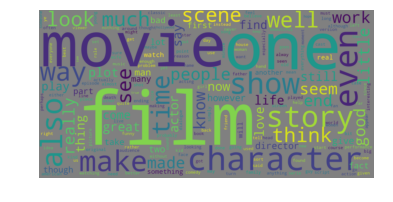

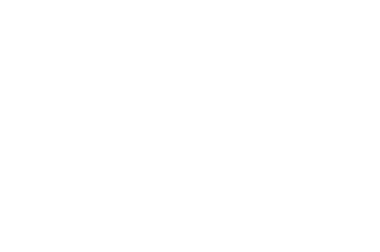

In [62]:
# Get the text and join all the reviews in training set
text = ' '.join(train_data[0]) 

# limit the word count and set the stopwords
wordcount = 500
stopwords = set(STOPWORDS)
stopwords.add("br")

# setup, generate and save the word cloud image to a file
wc = WordCloud(scale=5, 
               background_color="grey", 
               max_words=wordcount, 
               stopwords=stopwords)
wc.generate(text)
wc.to_file("WordCloud.png")

# show the wordcloud as output
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.axis("off")
plt.show()

____
### Summary  Statistics:

In [64]:
# print  number of unique words
print("Number of words: ")
print(len(np.unique(np.hstack(x_train))))
print ()

# print the average review length
print("Average review length:")
result = [len(x) for x in x_train]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))

Number of words: 
88585

Average review length:
Mean 238.71 words (176.493674)


As you can see the number of unique words in the dataset is given as 88.585. This is an interesting fact indicating that there are less than 100.000 words within the whole dataset. Moreover, the calculated average review length amounts to 238.71 words in total with a standard deviation of 176.49 words.

____
### Boxplot

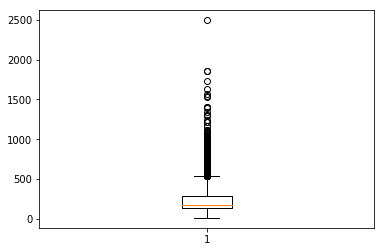

In [65]:
# with matplotlib we can plot a boxplot to show the review length in words

plt.boxplot(result)
plt.show()

As a result, we get to the information that most reviews have less than 500 words and the mass of the distribution can be covered with a length of 400 to 500 words. Further, the overall distribution review length is positively skewed.

___
### Which words make a review positive or negative?

In addition, to show how the combination of words can influence the polarity of a given text, we need to have a basic understanding of the concept of n-grams. N-grams are the result of fragmenting a text into N consecutive pieces.<br><br> For example: “Good” (unigram) is definitely positive and “very good” (bigram) even more. However, “not good” (bigram) seems to be less positive. <br><br> Therefore, you can use the NLTK library to remove the stopwords from the original dataset. Further, you can apply a simple logistic regression to get more insights to what important unigrams and bigrams make a review positive or negative.

___
#### Which words make a review positive?

In [70]:
vocabulary = vectorizer.get_feature_names()
coef = logistic_model.coef_
word_importances = pd.DataFrame({'word': vocabulary, 'coef': coef.tolist()[0]})
word_importances_sorted = word_importances.sort_values(by='coef', ascending = False)
word_importances_sorted[:10]

,coef,word
2969,0.672635,excellent
6681,0.563958,perfect
9816,0.521026,wonderful
8646,0.520818,superb
3165,0.505146,favorite
431,0.502118,amazing
5923,0.481505,must see
5214,0.461807,loved
3632,0.458645,funniest
2798,0.453481,enjoyable


___
#### Which words make a review negative?

In [71]:
word_importances_sorted[-11:-1]

,coef,word
6864,-0.564446,poor
2625,-0.565503,dull
9855,-0.575061,worse
4267,-0.588133,horrible
2439,-0.596303,disappointing
6866,-0.675187,poorly
1045,-0.681608,boring
2440,-0.688024,disappointment
702,-0.811185,awful
9607,-0.838195,waste


___
#### Which 2-grams make it positive?

In [72]:
word_importances_bigrams = word_importances_sorted[word_importances_sorted.word.apply(lambda c: len(c.split()) >= 2)]
word_importances_bigrams[:10]

,coef,word
5923,0.481505,must see
3,0.450675,10 10
6350,0.421314,one best
9701,0.389081,well worth
5452,0.371277,may not
6139,0.329485,not bad
6970,0.323805,pretty good
2259,0.307238,definitely worth
5208,0.303380,love movie
9432,0.301404,very good


___
#### Which 2-grams make it negative?

In [73]:
word_importances_bigrams[-11:-1]

,coef,word
6431,-0.247169,only good
3151,-0.250090,fast forward
9861,-0.264564,worst movie
6201,-0.324169,not recommend
6153,-0.332796,not even
6164,-0.333147,not funny
6217,-0.357056,not very
6169,-0.368976,not good
6421,-0.437750,one worst
9609,-0.451138,waste time
